In [395]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tqdm

import geopandas as gpd
import geoplotlib
from shapely.geometry import Polygon, MultiPolygon, Point


import warnings
warnings.filterwarnings('ignore')


In [396]:
NET_EMISSION_FILE_PATH = './/sdg_13_10_esmsip2.sdmx//UNFCCC_v26.csv'
INFANT_MORTALITY_PER_BIRTH = "./HFA_73_EN.xlsx"
POPULATION_FILE_PATH = "./tps00001.tsv/tps00001.tsv"

YEAR = 1990

In [397]:
pop_df = pd.read_csv(POPULATION_FILE_PATH, sep='\t', encoding='latin-1')
pop_df['indic_de,geo\\time'] = pop_df['indic_de,geo\\time'].apply(lambda x: x.split(',')[1])
pop_df = pop_df.applymap(lambda x: x.split(' ')[0])

pop_df = pop_df.rename(columns={'indic_de,geo\\time': 'ISO 2'})

values = []
for index, row in tqdm.tqdm(pop_df.iterrows(), total=len(pop_df)):
    for col in pop_df.columns[1:]:
        value = [row['ISO 2'], col, row[col]]
        values.append(value)

pop_df = pd.DataFrame(values, columns=['ISO 2', 'YEAR', 'Population'])
pop_df = pop_df.replace(':', np.nan)
pop_df.head(10)



        

100%|██████████| 53/53 [00:00<00:00, 5183.47it/s]


,ISO 2,YEAR,Population
0,AD,2012,78115
1,AD,2013,76246
2,AD,2014,NaN
3,AD,2015,NaN
4,AD,2016,71732
5,AD,2017,NaN
6,AD,2018,74794
7,AD,2019,76177
8,AD,2020,77543
9,AD,2021,NaN


<Axes: >

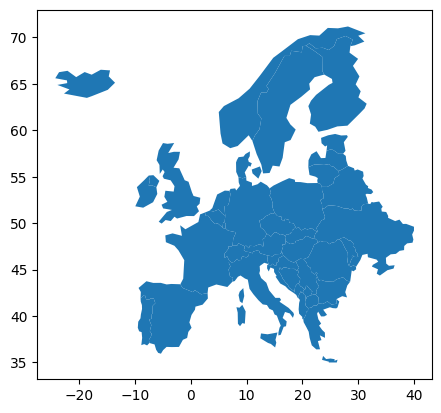

In [398]:
# Get the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Isolate Europe
europe=world[world.continent=='Europe']
#Remove Russia and Iceland
europe=europe[(europe.name!='Russia')]
#Clip polygon from the map of Europe
polygon = Polygon([(-25,35), (40,35), (40,75),(-25,75)])
europe=gpd.clip(europe, polygon) 
europe.plot()

In [399]:
enviroment_df = pd.read_csv(NET_EMISSION_FILE_PATH, encoding='ISO-8859-1')
enviroment_df.rename(columns={'Country': 'name'}, inplace=True)
enviroment_df.head()

,Country_code,name,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
0,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,2000,11.91735,NaN,20230418,EEA
1,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,2007,12.33353,NaN,20230418,EEA
2,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,1994,51614.43084,NaN,20230418,EEA
3,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,1995,54161.64859,NaN,20230418,EEA
4,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,2007,60487.91513,NaN,20230418,EEA


In [400]:
enviroment_df['emissions'].fillna(0, inplace=True)
enviroment_df.head()

,Country_code,name,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
0,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,2000,11.91735,NaN,20230418,EEA
1,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,2007,12.33353,NaN,20230418,EEA
2,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,1994,51614.43084,NaN,20230418,EEA
3,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,1995,54161.64859,NaN,20230418,EEA
4,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,2007,60487.91513,NaN,20230418,EEA


In [401]:
enviroment_df[enviroment_df['emissions'] < 0 ]

,Country_code,name,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
1508,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4,"4 - Land Use, Land-Use Change and Forestry",Sectors/Totals_incl_incl,Gg CO2 equivalent,1992,-9522.50740,NaN,20230418,EEA
1509,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4,"4 - Land Use, Land-Use Change and Forestry",Sectors/Totals_incl_incl,Gg CO2 equivalent,1998,-19254.13769,NaN,20230418,EEA
1510,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4.A,4.A - Forest Land,4,Gg CO2 equivalent,1993,-17422.97146,NaN,20230418,EEA
1511,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4.A,4.A - Forest Land,4,Gg CO2 equivalent,1995,-18838.26430,NaN,20230418,EEA
1512,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4.A,4.A - Forest Land,4,Gg CO2 equivalent,2015,-7038.57862,NaN,20230418,EEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649763,SK,Slovakia,IPCC Common Reporting Format,CO2,4.C.2,4.C.2 - Land converted to grassland,4.C,Gg,2014,-182.36800,NaN,20230418,EEA
649764,SK,Slovakia,IPCC Common Reporting Format,CO2,4.C.2,4.C.2 - Land converted to grassland,4.C,Gg,2021,-55.22764,NaN,20230418,EEA
649810,SK,Slovakia,IPCC Common Reporting Format,CO2,4.G,4.G - Harvested Wood Products,4,Gg,2000,-920.07105,NaN,20230418,EEA
649811,SK,Slovakia,IPCC Common Reporting Format,CO2,4.G,4.G - Harvested Wood Products,4,Gg,2005,-1996.45596,NaN,20230418,EEA


In [402]:
enviroment_df.Unit.unique()

array(['Gg CO2 equivalent', 'Gg'], dtype=object)

In [403]:
enviroment_df['Pollutant_name'].unique()

array(['All greenhouse gases - (CO2 equivalent)', 'CH4', 'CO2',
       'HFCs - (CO2 equivalent)', 'N2O', 'NF3 - (CO2 equivalent)',
       'PFCs - (CO2 equivalent)', 'SF6 - (CO2 equivalent)',
       'Unspecified mix of HFCs and PFCs - (CO2 equivalent)'],
      dtype=object)

In [404]:
grouped_df = enviroment_df.groupby(['name', 'Year' ])['emissions'].sum().reset_index()
grouped_df.head(6)

,name,Year,emissions
0,Austria,1985,-3.384715e+03
1,Austria,1986,-3.428596e+03
2,Austria,1987,-3.067215e+03
3,Austria,1988,-4.935998e+03
4,Austria,1989,-6.134864e+03
5,Austria,1990,1.361786e+06


In [405]:
grouped_df['emissions'].max()

73054602.2401

In [406]:
YEAR = 2019

In [407]:
#df = grouped_df[grouped_df['Pollutant_name'] == 'All greenhouse gases - (CO2 equivalent)']
df = grouped_df[grouped_df['Year'] == YEAR]

selected_countries=europe[europe.name.isin(list(df.name))]
selected_countries=selected_countries.merge(df,on='name',how='left')
min_value = 0
max_value = selected_countries['emissions'].max() 
max_value = 7201328.42322
print(min_value, max_value)

selected_countries.head()

0 7201328.42322


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Year,emissions
0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",2019,4.027095e+06
1,10269417.0,Europe,Portugal,PRT,238785,"POLYGON ((-8.67195 42.13469, -8.26386 42.28047...",2019,6.913439e+05
2,47076781.0,Europe,Spain,ESP,1393490,"POLYGON ((-7.53711 37.42890, -7.16651 37.80389...",2019,2.160781e+06
3,60297396.0,Europe,Italy,ITA,2003576,"MULTIPOLYGON (((11.04856 46.75136, 11.16483 46...",2019,4.650959e+06
4,4067500.0,Europe,Croatia,HRV,60752,"POLYGON ((16.88252 46.38063, 17.63007 45.95177...",2019,7.864005e+04


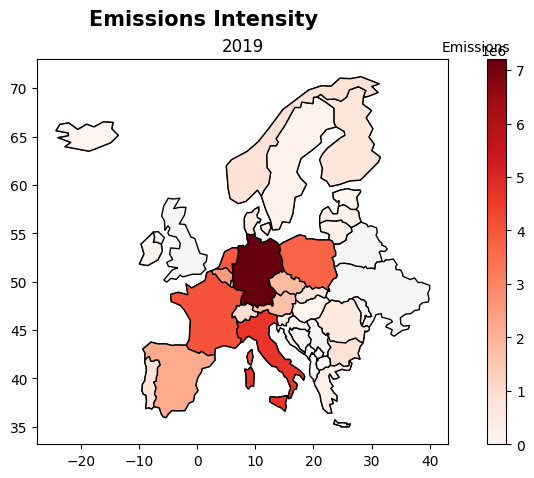

In [408]:
fig, ax = plt.subplots(1, figsize=(10, 5))
fig.suptitle("Emissions Intensity", fontweight="bold", fontsize=15)

europe.plot(color="whitesmoke", edgecolor="black", ax=ax)
selected_countries.plot('emissions', cmap="Reds", edgecolor="black", ax=ax, vmin=min_value, vmax=max_value)
ax.set_title(str(YEAR))

# Colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Emissions", rotation=0, y=1.05, labelpad=-35)

#plt.savefig("Emissions Intensity 2020.jpeg", dpi=300)
plt.show()

In [409]:
def random_point_inside_polygon(polygon):
    # Create a bounding box around the polygon
    minx, miny, maxx, maxy = polygon.bounds
    
    while True:
        # Generate a random point within the bounding box
        random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        
        # Check if the random point is inside the polygon
        if polygon.contains(random_point):
            return random_point

def random_point_inside_multipolygon(multipolygon):
    # Randomly select one of the polygons in the MultiPolygon
    chosen_polygon = random.choice(list(multipolygon))
    
    return random_point_inside_polygon(chosen_polygon)

In [410]:
med_df = pd.read_excel(INFANT_MORTALITY_PER_BIRTH, sheet_name='Data (table)')
countries_df = pd.read_excel(INFANT_MORTALITY_PER_BIRTH, sheet_name='Countries')
countries_df.rename(columns={'Code': 'COUNTRY_REGION'}, inplace=True)
med_df = med_df.merge(countries_df, on='COUNTRY_REGION', how='left')
med_df.rename(columns={'Full name': 'name'}, inplace=True)
med_df = med_df.drop(columns=['SEX','ISO 3', 'WHO code', 'Short name'], axis=1)

med_df.head()

,Measure code,COUNTRY_REGION,YEAR,VALUE,ISO 2,name
0,HFA_73,ALB,1978,76.55,AL,Albania
1,HFA_73,ALB,1979,71.18,AL,Albania
2,HFA_73,ALB,1980,66.16,AL,Albania
3,HFA_73,ALB,1981,61.48,AL,Albania
4,HFA_73,ALB,1982,57.12,AL,Albania


In [411]:
med_selected_countries=europe[europe.name.isin(list(med_df.name))]
med_selected_countries = med_selected_countries.merge(med_df,on='name',how='left')
#med_selected_countries = med_selected_countries.merge(pop_df, on=['ISO 2', int(YEAR)], how='left')

med_selected_countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Measure code,COUNTRY_REGION,YEAR,VALUE,ISO 2
0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1950,47.71,FR
1,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1951,44.51,FR
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1952,41.49,FR
3,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1953,38.62,FR
4,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1954,35.94,FR


In [412]:
type(pop_df['YEAR'].values[0])

str

In [413]:
pop = []
pop_df['YEAR'] = pop_df['YEAR'].astype(int)
for index, row in tqdm.tqdm(med_selected_countries.iterrows(), total=len(med_selected_countries)):
    new_cell = pop_df[(pop_df['ISO 2'] == row['ISO 2']) & (pop_df['YEAR'] == YEAR)]['Population'].values
    if len(new_cell) == 0 or new_cell is None:
        pop.append(np.nan)
    else:
        pop.append(new_cell[0])

med_selected_countries.reset_index(drop=True, inplace=True)
med_selected_countries['Population'] = pop
med_selected_countries.head()

  0%|          | 0/1986 [00:00<?, ?it/s]

100%|██████████| 1986/1986 [00:01<00:00, 1007.63it/s]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Measure code,COUNTRY_REGION,YEAR,VALUE,ISO 2,Population
0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1950,47.71,FR,67290471
1,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1951,44.51,FR,67290471
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1952,41.49,FR,67290471
3,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1953,38.62,FR,67290471
4,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1954,35.94,FR,67290471


In [414]:
med_selected_countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Measure code,COUNTRY_REGION,YEAR,VALUE,ISO 2,Population
0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1950,47.71,FR,67290471
1,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1951,44.51,FR,67290471
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1952,41.49,FR,67290471
3,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1953,38.62,FR,67290471
4,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...",HFA_73,FRA,1954,35.94,FR,67290471
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((29.39955 69.15692, 28.59193 69.06478...",HFA_73,NOR,2015,2.21,NO,5328212
1982,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((29.39955 69.15692, 28.59193 69.06478...",HFA_73,NOR,2016,2.15,NO,5328212
1983,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((29.39955 69.15692, 28.59193 69.06478...",HFA_73,NOR,2017,2.09,NO,5328212
1984,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((29.39955 69.15692, 28.59193 69.06478...",HFA_73,NOR,2018,2.03,NO,5328212


In [415]:

for index, row in tqdm.tqdm(med_selected_countries.iterrows(), total=len(med_selected_countries)):
    if row['Population'] is np.nan or row['VALUE'] is np.nan:
        med_selected_countries.at[index, 'patients'] = np.nan
    else:
        med_selected_countries.at[index, 'patients'] = float(row['VALUE']) * int(row['Population']) / 1000


100%|██████████| 1986/1986 [00:00<00:00, 5155.74it/s]


In [416]:
points = []
med_selected_countries = med_selected_countries[med_selected_countries['YEAR'] == YEAR]
for index, row in tqdm.tqdm(med_selected_countries.iterrows(), total=len(med_selected_countries)):
    if not pd.isna(row['patients']):
        for i in range(int(row['patients'])):
            new_row = [row['name'], random_point_inside_polygon(row['geometry'])]
            # Append the new row to the points_df DataFrame
            points.append(new_row)
    

  6%|▌         | 2/34 [02:12<35:13, 66.05s/it]   


KeyboardInterrupt: 

In [417]:
points_df = pd.DataFrame(points, columns=['name', 'geometry'])
points_df['longitude'] = points_df['geometry'].apply(lambda p: p.x)
points_df['latitude'] = points_df['geometry'].apply(lambda p: p.y)
points_df.head()

,name,geometry,longitude,latitude
0,France,POINT (1.5110225101702506 46.8389257233557),1.511023,46.838926
1,France,POINT (1.1443162859364993 46.06922997682506),1.144316,46.069230
2,France,POINT (6.397590592029079 47.753801133794155),6.397591,47.753801
3,France,POINT (0.6297516507956438 45.53788554186384),0.629752,45.537886
4,France,POINT (5.508723180623635 49.3176110953537),5.508723,49.317611


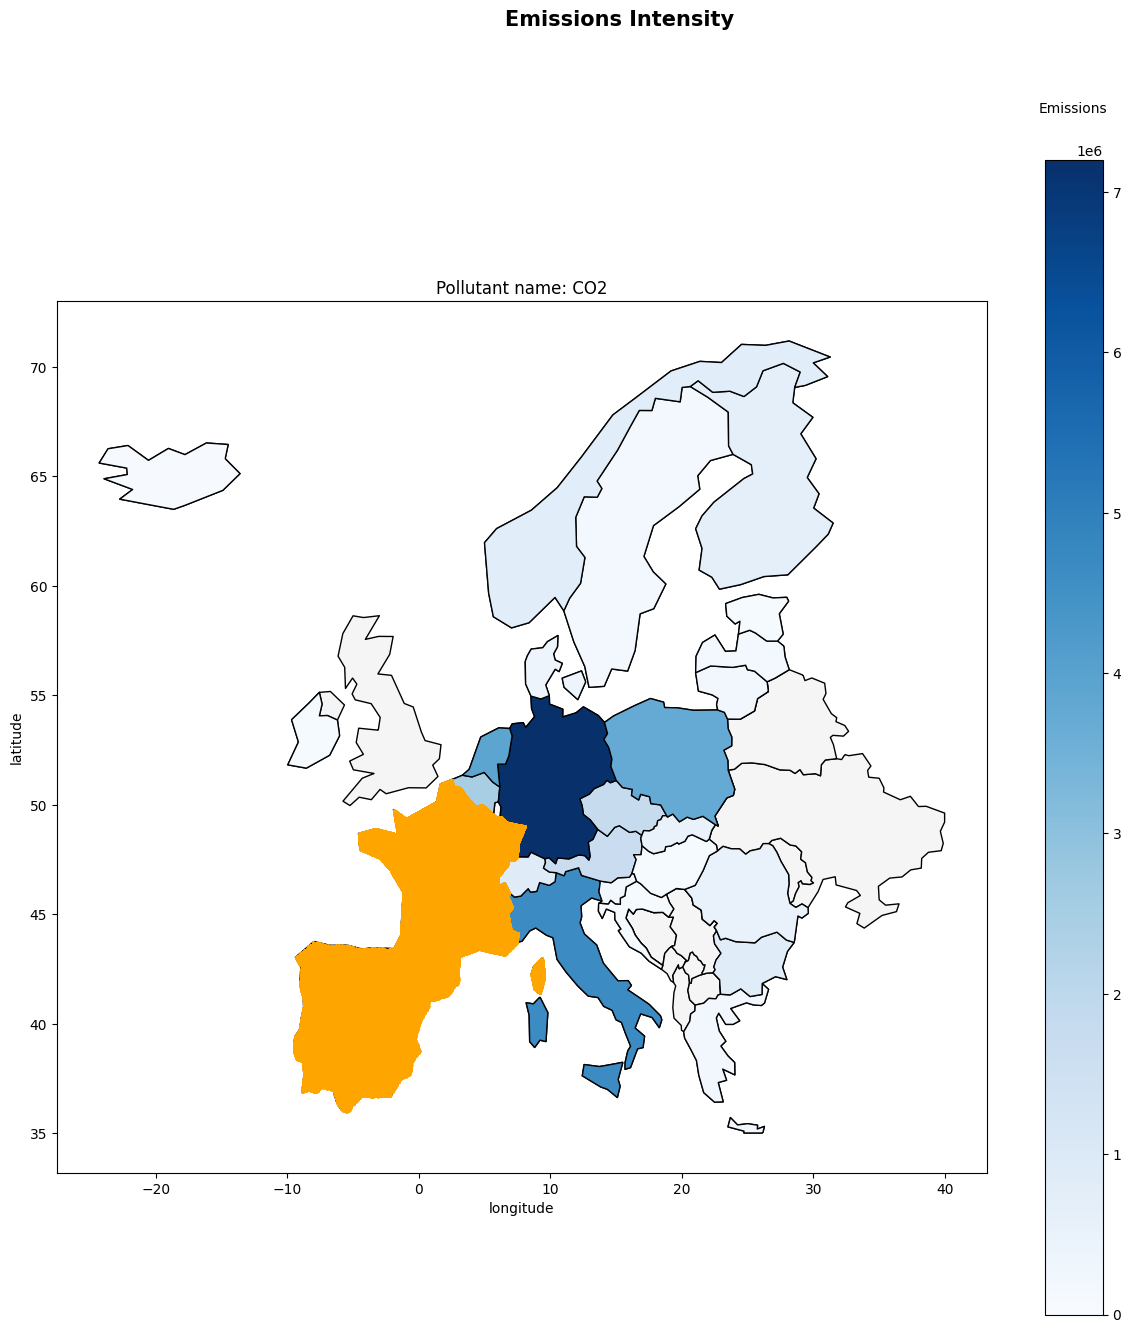

In [420]:
fig, ax = plt.subplots(1, figsize=(15, 15))
fig.suptitle("Emissions Intensity", fontweight="bold", fontsize=15)

europe.plot(color="whitesmoke", edgecolor="black", ax=ax)
selected_countries.plot('emissions', cmap="Blues", edgecolor="black", ax=ax, vmin=min_value, vmax=max_value)
points_df.plot(x="longitude", y="latitude", kind="scatter",color = 'orange', s=1, ax=ax)
ax.set_title("Pollutant name: CO2")

# Colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Emissions", rotation=0, y=1.05, labelpad=-35)

#plt.savefig("Emissions Intensity 2020.jpeg", dpi=300)
plt.show()